In [5]:
import pandas as pd
import numpy as np
import gc
import itertools
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from helpers.funcs import resample, single_ts_split, timeseries_train_test_split as TSSplit
import matplotlib.pyplot as plt
%matplotlib inline
NB_SEED = 123123

In [6]:
def setindexdatetime(df, index_col):
    df[index_col] = pd.to_datetime(df[index_col])
    df.set_index(index_col, inplace=True)
    df = df.astype(np.float)
    return df

In [7]:
tr = setindexdatetime(pd.read_csv('valids/v_ready_iqr_tr.csv'),'Timestamp')
ts = setindexdatetime(pd.read_csv('valids/v_ready_iqr_ts.csv'),'Timestamp')

In [8]:
tr.index.freq = '15T'

In [9]:
ts = resample(ts)

/home/berkkarahan/Desktop/tupras_isoforest/helpers/funcs.py:39: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  tseries.index[0], pd.tslib.Timestamp), 'Object must have a datetime-like index.'
/home/berkkarahan/Desktop/tupras_isoforest/helpers/funcs.py:73: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  tseries = tseries.resample(short_rate, how='mean').interpolate()
/home/berkkarahan/Desktop/tupras_isoforest/helpers/funcs.py:76: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ffill()
  tseries = tseries.resample(rate, how='ffill')


In [10]:
x_tr, x_ts, y_tr, y_ts = TSSplit(tr.drop('Target',1),tr.Target, test_size=0.30)

In [11]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor

/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/berkkarahan/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
from helpers.funcs import fit_model_cv

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
def print_metric(metrictr, metricts ,mname):
    print(mname +' train: ' + str(metrictr) + ' test: ' + str(metricts))

In [15]:
reg = RandomForestRegressor(n_estimators=200,random_state=NB_SEED)

In [16]:
mdls=fit_model_cv(reg, x_tr.values,y_tr.values)

In [17]:
y_pred_val = np.zeros((y_ts.shape[0],len(mdls)))
y_pred_tr = np.zeros((y_tr.shape[0],len(mdls)))
for i, m in enumerate(mdls):
    y_pred_val[:,i]= m.predict(x_ts.values)
    y_pred_tr[:,i] = m.predict(x_tr.values)
y_pred_val = y_pred_val.mean(axis=1)
y_pred_tr = y_pred_tr.mean(axis=1)

In [18]:
mse_tr = mean_squared_error(y_tr.values, y_pred_tr)
rmse_tr = np.sqrt(mse_tr)
mae_tr = mean_absolute_error(y_tr.values, y_pred_tr)
r2_tr=r2_score(y_tr, y_pred_tr)
mse_ts = mean_squared_error(y_ts.values, y_pred_val)
rmse_ts = np.sqrt(mse_ts)
mae_ts = mean_absolute_error(y_ts.values, y_pred_val)
r2_ts = r2_score(y_ts.values, y_pred_val)

In [19]:
print_metric(mse_tr,mse_ts,'MSE')
print_metric(rmse_tr,rmse_ts,'RMSE')
print_metric(mae_tr,mae_ts,'MAE')
print_metric(r2_tr,r2_ts,'R2')

MSE train: 10.324655057647398 test: 28.809204236000728
RMSE train: 3.213200127232569 test: 5.36742063155113
MAE train: 2.0892493082202166 test: 3.993245800494347
R2 train: 0.6179789700387898 test: 0.19245960838629816


In [20]:
y_pred = pd.Series(data=y_pred_val, index=y_ts.index)

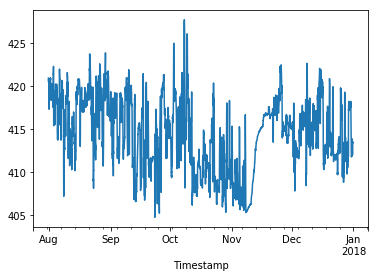

In [21]:
y_pred.plot()

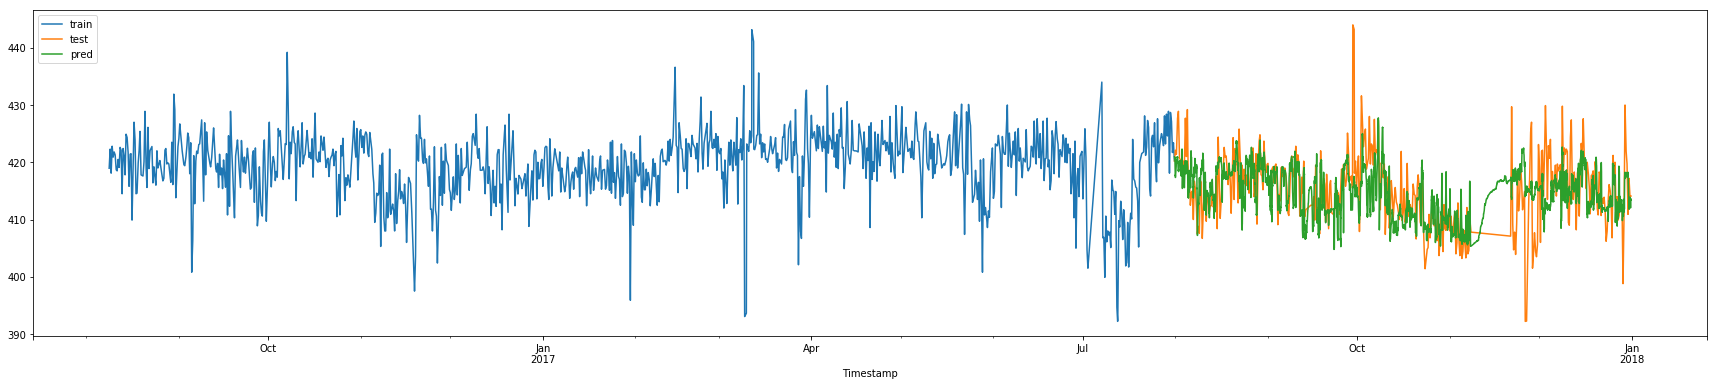

In [22]:
fig, ax = plt.subplots(figsize=(30,6))
y_tr.plot(label='train')
y_ts.plot(label='test')
y_pred.plot(label='pred')
plt.legend(loc='upper left')

In [23]:
del reg, mdls;gc.collect()

26

In [24]:
reg = ExtraTreesRegressor(random_state=NB_SEED)

In [25]:
mdls=fit_model_cv(reg, x_tr.values,y_tr.values)

In [26]:
#mdls = fit_model_cv(reg,x_tr.values,y_tr.values)
y_pred_val = np.zeros((y_ts.shape[0],len(mdls)))
y_pred_tr = np.zeros((y_tr.shape[0],len(mdls)))
for i, m in enumerate(mdls):
    y_pred_val[:,i]= m.predict(x_ts.values)
    y_pred_tr[:,i] = m.predict(x_tr.values)
y_pred_val = y_pred_val.mean(axis=1)
y_pred_tr = y_pred_tr.mean(axis=1)

In [27]:
mse_tr = mean_squared_error(y_tr.values, y_pred_tr)
rmse_tr = np.sqrt(mse_tr)
mae_tr = mean_absolute_error(y_tr.values, y_pred_tr)
r2_tr=r2_score(y_tr, y_pred_tr)
mse_ts = mean_squared_error(y_ts.values, y_pred_val)
rmse_ts = np.sqrt(mse_ts)
mae_ts = mean_absolute_error(y_ts.values, y_pred_val)
r2_ts = r2_score(y_ts.values, y_pred_val)

In [28]:
print_metric(mse_tr,mse_ts,'MSE')
print_metric(rmse_tr,rmse_ts,'RMSE')
print_metric(mae_tr,mae_ts,'MAE')
print_metric(r2_tr,r2_ts,'R2')

MSE train: 9.125084851994004 test: 26.838317984456175
RMSE train: 3.0207755381679724 test: 5.180571202527399
MAE train: 1.9080680421269713 test: 3.9544813541069
R2 train: 0.6623640892428507 test: 0.24770480857858534


In [29]:
y_pred = pd.Series(data=y_pred_val, index=y_ts.index)

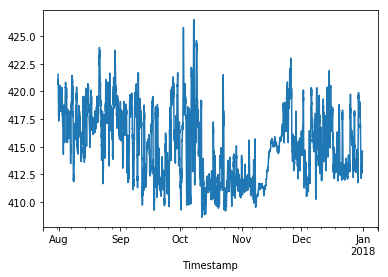

In [30]:
y_pred.plot()

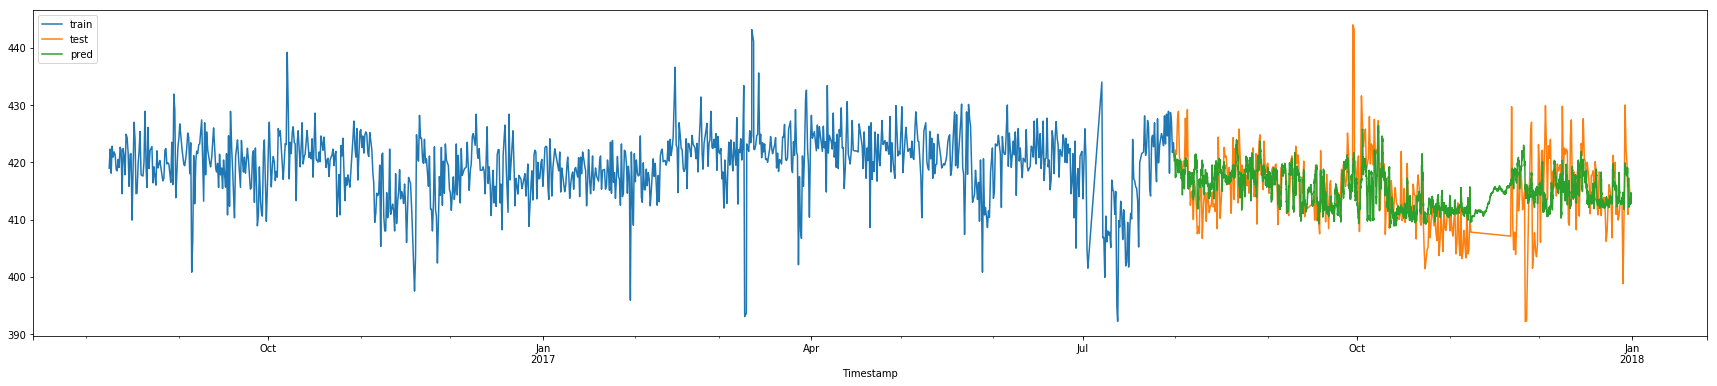

In [31]:
fig, ax = plt.subplots(figsize=(30,6))
y_tr.plot(label='train')
y_ts.plot(label='test')
y_pred.plot(label='pred')
plt.legend(loc='upper left')

In [32]:
del reg, mdls;gc.collect()

12

In [33]:
reg = AdaBoostRegressor(random_state=NB_SEED)

In [34]:
mdls = fit_model_cv(reg,x_tr.values,y_tr.values)
y_pred_val = np.zeros((y_ts.shape[0],len(mdls)))
y_pred_tr = np.zeros((y_tr.shape[0],len(mdls)))
for i, m in enumerate(mdls):
    y_pred_val[:,i]= m.predict(x_ts.values)
    y_pred_tr[:,i] = m.predict(x_tr.values)
y_pred_val = y_pred_val.mean(axis=1)
y_pred_tr = y_pred_tr.mean(axis=1)

In [35]:
mse_tr = mean_squared_error(y_tr.values, y_pred_tr)
rmse_tr = np.sqrt(mse_tr)
mae_tr = mean_absolute_error(y_tr.values, y_pred_tr)
r2_tr=r2_score(y_tr, y_pred_tr)
mse_ts = mean_squared_error(y_ts.values, y_pred_val)
rmse_ts = np.sqrt(mse_ts)
mae_ts = mean_absolute_error(y_ts.values, y_pred_val)
r2_ts = r2_score(y_ts.values, y_pred_val)

In [36]:
print_metric(mse_tr,mse_ts,'MSE')
print_metric(rmse_tr,rmse_ts,'RMSE')
print_metric(mae_tr,mae_ts,'MAE')
print_metric(r2_tr,r2_ts,'R2')

MSE train: 16.915487318784393 test: 26.332326832688093
RMSE train: 4.112844188488593 test: 5.131503369645984
MAE train: 3.1711599742424608 test: 3.793189517609457
R2 train: 0.37411256339925913 test: 0.2618880636766646


In [37]:
y_pred = pd.Series(data=y_pred_val, index=y_ts.index)

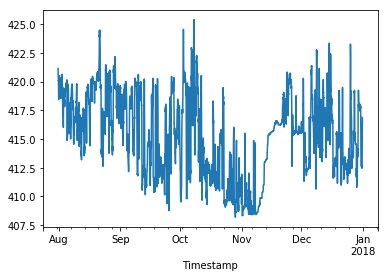

In [38]:
y_pred.plot()

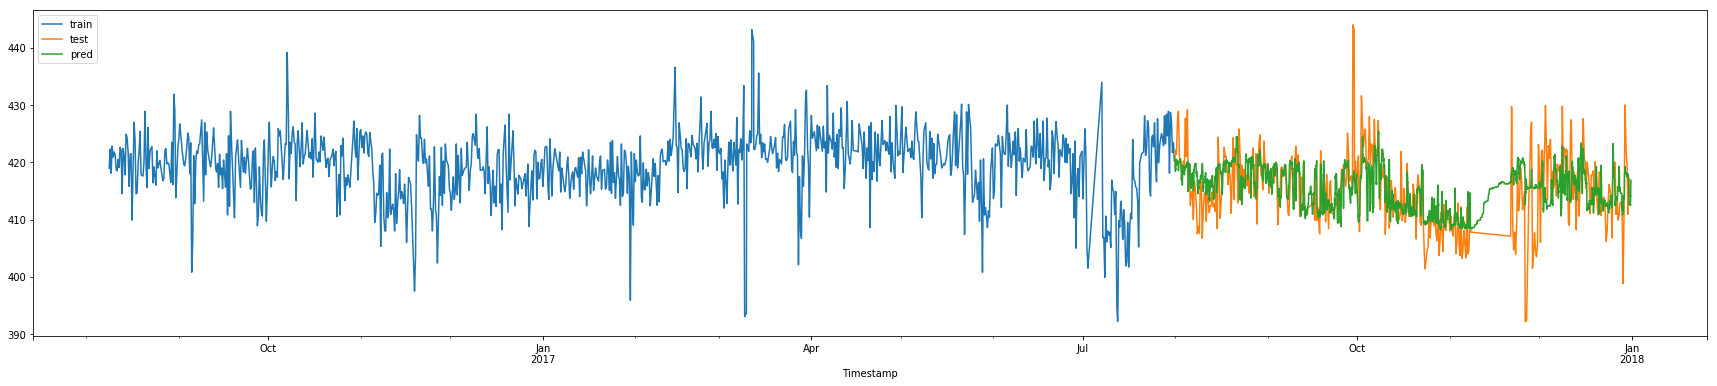

In [39]:
fig, ax = plt.subplots(figsize=(30,6))
y_tr.plot(label='train')
y_ts.plot(label='test')
y_pred.plot(label='pred')
plt.legend(loc='upper left')